In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


- HTML web scrapping using **BeautifulSoup(!pip3 install bs4) python library**.
- Send an HTTP request to the URL of the webpage you want to access. The server responds to the request by returning the HTML content of the webpage. For this task, we will use a third-party HTTP library for **python-requests(!pip3 install requests)**.
- In order to work with the HTML, we will have to get the HTML as a string. We can easily get HTML data by using get() function in **requests module(!pip3 install requests)**.
- Once the HTML is fetched using requests the next step will be to **parse(!pip3 install html5lib)** the HTML content.

- A really nice thing about the BeautifulSoup library is that it is built on the top of the HTML parsing libraries like **html5lib, lxml, html.parser**, etc. So  BeautifulSoup object and specify the parser library can be created at the same time.

In [ ]:
#Installing modules
!pip3 install pandas requests BeautifulSoup4
!pip3 install requests
!pip3 install bs4
!pip3 install html5lib


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
# Store url
url = 'https://www.gutenberg.org/files/2701/2701-h/2701-h.htm'


In [ ]:
# Make the request and check object type
r = requests.get(url)
type(r)

requests.models.Response

In [ ]:
#Extract HTML from Response object and print
html = r.text
print(html)

In [ ]:
# Import BeautifulSoup from bs4
from bs4 import BeautifulSoup
# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, "html5lib")
type(soup)

bs4.BeautifulSoup

In [ ]:
# Get soup title
soup.title

<title>The Project Gutenberg eBook of Moby Dick; Or the Whale, by Herman Melville</title>

In [ ]:
# Get soup title as string
soup.title.string

'The Project Gutenberg eBook of Moby Dick; Or the Whale, by Herman Melville'

In [ ]:
# Get hyperlinks from soup and check out first several
soup.findAll('a')[:8]

[<a href="https://www.gutenberg.org">www.gutenberg.org</a>,
 <a href="#link2H_4_0002"> ETYMOLOGY. </a>,
 <a href="#link2H_4_0003"> EXTRACTS (Supplied by a Sub-Sub-Librarian).
         </a>,
 <a href="#link2HCH0001"> CHAPTER 1. Loomings. </a>,
 <a href="#link2HCH0002"> CHAPTER 2. The Carpet-Bag. </a>,
 <a href="#link2HCH0003"> CHAPTER 3. The Spouter-Inn. </a>,
 <a href="#link2HCH0004"> CHAPTER 4. The Counterpane. </a>,
 <a href="#link2HCH0005"> CHAPTER 5. Breakfast. </a>]

In [ ]:
# Get the text out of the soup and print it
text = soup.get_text()
print(text)

In [ ]:
# Import regex package
import re
# Define sentence
sentence = 'peter piper pick a peck of pickled peppers'
# Define regex
ps = 'p\w+'
# Find all words in sentence that match the regex and print them
re.findall(ps, sentence)

['peter', 'piper', 'pick', 'peck', 'pickled', 'peppers']

In [ ]:
# Find all words and print them
re.findall('\w+', sentence)

['peter', 'piper', 'pick', 'a', 'peck', 'of', 'pickled', 'peppers']

In [ ]:
# Find all words in Moby Dick and print several
tokens = re.findall('\w+', text)
tokens[:8]

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Moby', 'Dick', 'Or']

In [ ]:
# Import RegexpTokenizer from nltk.tokenize
from nltk.tokenize import RegexpTokenizer

# Create tokenizer
tokenizer = RegexpTokenizer('\w+')

# Create tokens
tokens = tokenizer.tokenize(text)
tokens[:8]

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Moby', 'Dick', 'Or']

In [ ]:
# Initialize new list
words = []

# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())

# Print several items from list as sanity check
words[:8]

['the', 'project', 'gutenberg', 'ebook', 'of', 'moby', 'dick', 'or']

In [ ]:
import re
import nltk
nltk.download('stopwords')

# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
sw[:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we']

In [ ]:
# Initialize new list
words_ns = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Print several list items as sanity check
words_ns[:8]

['project',
 'gutenberg',
 'ebook',
 'moby',
 'dick',
 'whale',
 'herman',
 'melville']

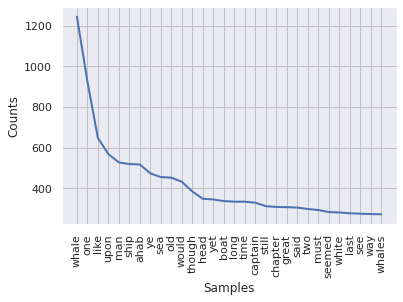

In [ ]:
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(30)

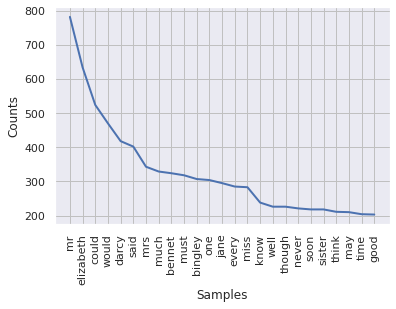

In [ ]:
def plot_word_freq(url):
    """Takes a url  and plots a word frequency
    distribution"""
    # Make the request and check object type
    r = requests.get(url)
    # Extract HTML from Response object 
    html = r.text
    # Create a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, "html5lib")
    # Get the text out of the soup and print it
    text = soup.get_text()
    # Create tokenizer
    tokenizer = RegexpTokenizer('\w+')
    # Create tokens
    tokens = tokenizer.tokenize(text)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Initialize new list
    words_ns = []
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
    # Create freq dist and plot
    freqdist1 = nltk.FreqDist(words_ns)
    freqdist1.plot(25)


plot_word_freq('https://www.gutenberg.org/files/42671/42671-h/42671-h.htm')


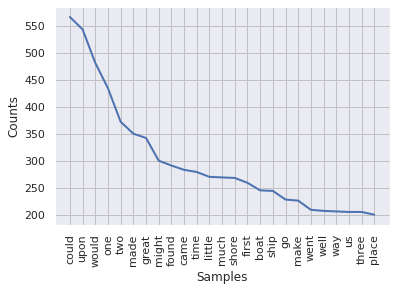

In [ ]:
plot_word_freq('https://www.gutenberg.org/files/521/521-h/521-h.htm')


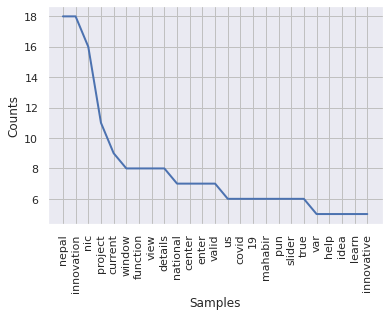

In [ ]:
plot_word_freq('https://nicnepal.org/')
